### Insights of Exploratory Data Analysis from [2019 Stack Overflow Developer Survey](https://insights.stackoverflow.com/survey).
There are six sections in this survey. 
* Basic Information
* Education, Work, and Career
* Technology and Tech Culture
* Stack Overflow Usage + Community
* Demographic Information
* Survey Review

### Major Python resources used for this analysis
* [MatplotLib](https://matplotlib.org/) 
* [Pandas](https://pandas.pydata.org/)
* [Seaborn](https://seaborn.pydata.org/)

In [2]:
import matplotlib.pyplot as plt  # for plotting graphs
# import required python libraries
import pandas as pd
import seaborn as sns

 # this is used to plot on Juputer notebook console, if you want to have plots as separate window, 
 # please use plt.show()
%matplotlib inline

# load main data set in to Pandas dataframe
df = pd.read_csv('./data/survey_results_public-2019.csv') # main Pandas Df 
# load schema data set in to Pandas DF
schema_df = pd.read_csv('./data/survey_results_schema-2019.csv')
# preview head of the dataset
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
# schema is discribed, what are available features in this data set with the feature definitions.
schema_df.values

array([['Respondent',
        'Randomized respondent ID number (not in order of survey response time)'],
       ['MainBranch',
        'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'],
       ['Hobbyist', 'Do you code as a hobby?'],
       ['OpenSourcer', 'How often do you contribute to open source?'],
       ['OpenSource',
        'How do you feel about the quality of open source software (OSS)?'],
       ['Employment',
        'Which of the following best describes your current employment status?'],
       ['Country', 'In which country do you currently reside?'],
       ['Student',
        'Are you currently enrolled in a formal, degree-granting college or university program?'],
       ['EdLevel',
        'Which of the following best describes the highest level of formal education that you’ve completed?'],
       ['UndergradMajor',
        'What was your main or most important field of study?'],
       ['EduOther',
  

### Questions that are going to discuss in this analysis
* What is the overall job satisfaction in the IT industry?
* What are gender and age differences in job satisfaction?
* How does education relate to job satisfaction?
* How does income level affect job satisfaction?

In [5]:
"""
Pandas value_counts is an inbuilt pandas function that returns an object containing counts of 
unique values in sorted order. 
"""
df['JobSat'].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

Text(0, 0.5, 'Number of Respondents')

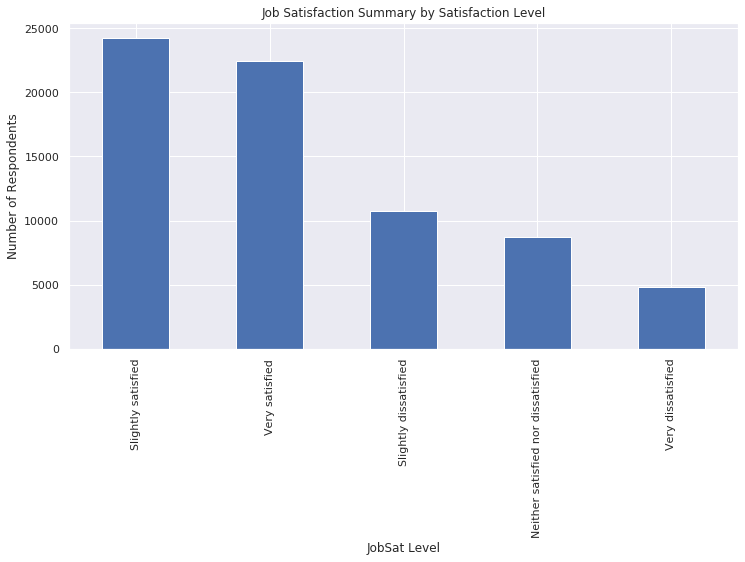

In [6]:
# setting the font scale for matplot graphs
sns.set(font_scale=1)
# Exploratory visualization for `JobSat` colunm, using summetion of each qunique values in `JobSat`. i.e JobSat level
df['JobSat'].value_counts().plot.bar(figsize=(12, 6))

# matplotlib decorations for the graph
plt.title('Job Satisfaction Summary by Satisfaction Level') # titile 
plt.xlabel('JobSat Level') # X - axis 
plt.ylabel('Number of Respondents') # Y -axis 

A total of 24207 of the employees were slightly satisfied, and another 22452 were very satisfied. Added together, these two groups formed 46659 of the samples. Slightly dissatisfied and very dissatisfied employees were only 10752 and 4857 respectively. It can conclude that most of the employees are satisfied with their job among all respondents.  

In [7]:
# formating and grouping `Gender` with more readable 
df.loc[(df['Gender']  !='Man') & (df['Gender'] !='Woman'), 'Gender'] = 'Other'
df.loc[ df['Gender']  =='Man', 'Gender'] = 'Male'
df.loc[ df['Gender']  =='Woman', 'Gender'] = 'Female'

In [10]:
# remoev missing values for `JobSat` column
df['JobSat'].dropna(axis=0)

2                        Slightly satisfied
3                        Slightly satisfied
4                     Slightly dissatisfied
5                        Slightly satisfied
6        Neither satisfied nor dissatisfied
                        ...                
88326    Neither satisfied nor dissatisfied
88327    Neither satisfied nor dissatisfied
88328    Neither satisfied nor dissatisfied
88329                     Very dissatisfied
88330                 Slightly dissatisfied
Name: JobSat, Length: 70988, dtype: object

In [11]:
# select values for Job Satisfaction
job_sat_vals = ['Slightly satisfied','Very satisfied']
# select values for Job Dissatisfaction
job_dis_sat_vals = ['Slightly dissatisfied','Very dissatisfied']

In [12]:
# create a Pandas DF for most job satisfaction respondents
sat_job_respondents_df = df.copy()[(df['JobSat'] == job_sat_vals[0] ) | (df['JobSat'] == job_sat_vals[1])]
# create a Pandas DF fot least job satisfaction respondents
dis_sat_job_respondents_df = df.copy()[(df['JobSat'] == job_dis_sat_vals[0] ) | (df['JobSat']== job_dis_sat_vals[1])]

In [13]:
# assign a common value for `JobSat` in satisfaction respondent DF
sat_job_respondents_df.loc[:, 'JobSat'] = 'Satisfied'
# assign a common value for `JobSat` in dissatisfaction respondent DF
dis_sat_job_respondents_df.loc[:, 'JobSat'] = 'Dissatisfied'

In [14]:
# merge sat and dis sat dfs as one df using Pandas concat function
job_sat_respondents_df = pd.concat([sat_job_respondents_df, dis_sat_job_respondents_df], axis=0)

### Question 01
**Question 01:** What is the overall job satisfaction in the IT industry?

Text(0.5, 1.0, 'Overall Job Satisfaction Summary')

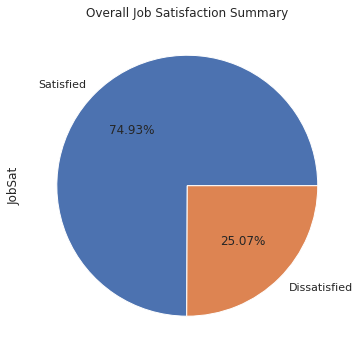

In [17]:
# setting the font scale for matplot graphs
sns.set(font_scale=1)
# draw a pie chart for `Overall Job Satisfaction` with common `JobSat` values. i.e Satisfied and Dissatisfied
job_sat_respondents_df['JobSat'].value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=(12, 6))
# set the title of the pie chart
plt.title('Overall Job Satisfaction Summary')

**Overall, 74.93 percent of employees are satisfied, whereas 25.07 percent are dissatisfied**

In [19]:
def merge_sat_and_dsat_by_cols(col):
    """
    INPUT:
        the column name that is joined two dataframes as an one dataframe.
    
    OUTPUT:
        merge df by using selected column
    """
    
    sat_job_df = sat_job_respondents_df.groupby([col]).size().sort_values(ascending=False)\
    .reset_index(name='SatCount')
    
    dis_sat_job_df = dis_sat_job_respondents_df.groupby([col]).size().sort_values(ascending=False)\
    .reset_index(name='DisSatCount')
    
    return pd.merge(sat_job_df, dis_sat_job_df , on=col)


In [ ]:
def calculate_sat_and_dsat_pecentage(merged_df):
    """
    INPUT:
        
        
    OUTPUT:
        
    """
    merged_df['SatPercentage'] = merged_df['SatCount'] / (merged_df['SatCount']+merged_df['DisSatCount']) 
    merged_df['SatPercentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in merged_df['SatPercentage']], 
                                           index = merged_df.index)
    
    merged_df['DisSatPercentage'] = merged_df['DisSatCount'] / (merged_df['SatCount']+merged_df['DisSatCount'])
    merged_df['DisSatPercentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in merged_df['DisSatPercentage']], 
                                              index = merged_df.index)
    
    total = merged_df['SatCount'] + merged_df['DisSatCount']
    total_sum = merged_df['SatCount'].sum() + merged_df['DisSatCount'].sum()
    merged_df['Total'] =  total
    
    merged_df['TotalPercentage'] = total/total_sum
    merged_df['TotalPercentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in merged_df['TotalPercentage']], 
                                              index = merged_df.index)
    return merged_df.sort_values(by='SatPercentage', ascending=False).reset_index(drop=True)

In [ ]:
merge_gender_df = merge_sat_and_dsat_by_cols('Gender')

In [ ]:
calculate_sat_and_dsat_pecentage(merge_gender_df)

In [ ]:
col_age_group = 'AgeGroup(Years)'
age_range_labels = ['15-24', '25-34','35-44','45-54','55-64']
most_job_sat_df.loc[:,col_age_group] = pd.cut(most_job_sat_df['Age'], bins=[14, 24, 34, 44, 54, 64], labels=age_range_labels)
un_sat_df.loc[:,col_age_group] = pd.cut(un_sat_df['Age'], bins=[14, 24, 34, 44, 54, 64],labels=age_range_labels)

In [ ]:
merged_age_group_df = merge_sat_and_dsat_by_cols(col_age_group)

In [ ]:
calculate_sat_and_dsat_pecentage(merged_age_group_df)


In [ ]:
fig ,axs = plt.subplots(1,2, figsize=(15, 15))
most_job_sat_df[col_age_group].value_counts().plot(kind='pie', ax=axs.flatten()[0], autopct='%1.2f%%')
axs[0].set_title('Job Satisfaction Age Groups')
un_sat_df[col_age_group].value_counts().plot(kind='pie', ax=axs.flatten()[1], autopct='%1.2f%%')
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)
axs[1].set_title('Job Dissatisfaction Age Groups')

In [ ]:
merged_edl_df = merge_sat_and_dsat_by_cols('EdLevel')

In [ ]:
calculate_sat_and_dsat_pecentage(merged_edl_df)

In [ ]:
merged_unmajor_df = merge_sat_and_dsat_by_cols('UndergradMajor')

In [ ]:
calculate_sat_and_dsat_pecentage(merged_unmajor_df)


In [ ]:
#before removing outliers
fig, axs = plt.subplots(1,2, figsize=(20,10))
most_job_sat_df.boxplot(column=['ConvertedComp'], ax=axs.flatten()[0])
axs[0].set_title('Income Level by Job Satisfaction')
un_sat_df.boxplot(column=['ConvertedComp'], ax=axs.flatten()[1])
axs[1].set_title('Income Level by Job Dissatisfaction')

In [ ]:
# after removing outliers
fig, axs = plt.subplots(1,2, figsize=(20,10))

most_job_sat_df[most_job_sat_df['ConvertedComp'] <= 175000].boxplot(column=['ConvertedComp'], ax=axs.flatten()[0])
axs[0].set_title('Most Job Satisfaction')
un_sat_df[un_sat_df['ConvertedComp'] <= 160000].boxplot(column=['ConvertedComp'], ax=axs.flatten()[1])
axs[1].set_title('Least Job Satisfaction')

In [ ]:
# salary ranges wise grouping
salary_range_labels = ['25K-50K', '50K-75K','75K-100K','100K-125K','125K-150K', '150K-175K']
salary_bins = [25000, 50000, 75000, 100000, 125000, 150000, 175000]
income_level_group = 'IncomeGroup($)'
most_job_sat_df.loc[:,income_level_group] = pd.cut(most_job_sat_df['ConvertedComp'], bins=salary_bins, labels=salary_range_labels)
un_sat_df.loc[:,income_level_group] = pd.cut(un_sat_df['ConvertedComp'], bins=salary_bins, labels=salary_range_labels)


In [ ]:
merged_income_group_df = merge_sat_and_dsat_by_cols(income_level_group)

In [ ]:
calculate_sat_and_dsat_pecentage(merged_income_group_df)

In [ ]:
gender_income_df = df.copy()[(df['Gender'] == 'Male') | (df['Gender'] == 'Female') ][['Gender', 'ConvertedComp', 'JobSat']]
gender_income_df  = gender_income_df.dropna(axis=0)

In [ ]:
gender_income_df.loc[:,income_level_group] = pd.cut(gender_income_df['ConvertedComp'], bins=salary_bins, labels=salary_range_labels)

gender_income_df = gender_income_df.dropna(subset=[income_level_group],axis=0)
selected_df =  gender_income_df.copy()[['Gender', income_level_group, 'JobSat']]

In [ ]:
selected_df.loc[selected_df['JobSat'] =='Slightly satisfied', 'JobSat'] = 'Satisfied'
selected_df.loc[selected_df['JobSat'] =='Very satisfied', 'JobSat'] = 'Satisfied'

In [ ]:
job_sat_income_gender_df =  selected_df[selected_df['JobSat'] =='Satisfied']\
    .groupby([income_level_group,'Gender'])\
    .count().reset_index()

In [ ]:
male_df = job_sat_income_gender_df[job_sat_income_gender_df['Gender'] == 'Male'][[income_level_group,'JobSat']]
male_df.columns = [income_level_group, 'MaleJobSat']

In [ ]:
female_df = job_sat_income_gender_df[job_sat_income_gender_df['Gender'] == 'Female'][[income_level_group,'JobSat']]
female_df.columns = [income_level_group, 'FemaleJobSat']

In [ ]:
gender_contact_df = pd.merge(female_df, male_df, on=income_level_group)
gender_contact_df

In [ ]:
gender_contact_df.index = salary_range_labels
gender_contact_df.plot(kind='bar' )
